In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('quasar_train.csv', delimiter=',')

lambd = data[0, :]
m = lambd.shape[0]

train_set = data[1:, :]
test_set = np.genfromtxt('quasar_test.csv', delimiter=',')[1:, :]

num_train = train_set.shape[0]
num_test = test_set.shape[0]

lambd_add_bias = np.vstack(
    [np.ones(lambd.shape), lambd]).T
first_sample_x = train_set[0, :]


smooth_train_set = np.load('smooth_train_set.npy')
smooth_test_set = np.load('smooth_test_set.npy')


def weight_matrix(index, tau):
    return np.diag(np.exp(-np.square(lambd - lambd[index]) / (2 * tau ** 2)))


def local_weight_LR(sample):
    y_hat = np.zeros((m,))
    tau = 5
    for i in range(m):
        Wi = weight_matrix(i, tau)
        theta_i = np.linalg.inv(lambd_add_bias.T.dot(Wi).dot(lambd_add_bias)) \
            .dot(np.dot(lambd_add_bias.T.dot(Wi), sample))
        y_hat[i] = theta_i[0] + lambd[i] * theta_i[1]
    return y_hat

def distance_matrix(dataset):
    num = dataset.shape[0]
    matrix = np.zeros((num, num_train))
    for i in range(num):
        matrix[i, :] = np.linalg.norm(smooth_train_set - dataset[i], axis=1)
    return matrix / np.amax(matrix, axis=1, keepdims=True)

def neighb(k=3, dataset='train'):
    if dataset == 'train':
        matrix = distance_matrix(smooth_train_set)
        k_index = np.argpartition(matrix, range(1, k+1), axis=1)[:, 1:(k + 1)]
        ker = 1. - np.partition(matrix, range(1, k+1), axis=1)[:, 1:(k + 1)]
    else:
        matrix = distance_matrix(smooth_test_set)
        k_index = np.argpartition(matrix, k, axis=1)[:, :k]
        ker = 1. - np.partition(matrix, k, axis=1)[:, :k]
    return k_index, ker

In [7]:
right_trains = smooth_train_set[:, 150:]
left_trains = smooth_train_set[:, :50]
right_tests = smooth_test_set[:, 150:]
left_tests = smooth_test_set[:, :50]

In [8]:
k_neighb_index, ker = neighb()
f_left_estimates = np.zeros_like(left_trains)

In [9]:
for i in range(num_train):
    f_left_estimates[i] = np.sum(ker[i][:, np.newaxis] * left_trains[k_neighb_index[i]], axis=0) / np.sum(ker[i])

In [10]:
error_train = np.sum((f_left_estimates - left_trains) ** 2)
print(error_train / num_train)

1.1166243835432714


In [11]:
k_test_index, ker_test = neighb(dataset='test')
f_left_estimates_test = np.zeros_like(left_tests)

for i in range(num_test):
    f_left_estimates_test[i] = np.sum(ker[i][:, np.newaxis] * left_trains[k_neighb_index[i]], axis=0) / np.sum(ker[i])

error_train = np.sum((f_left_estimates_test - left_tests) ** 2)
print(error_train / num_test)

2.476248324916176


In [12]:
estimates_stack = np.hstack([f_left_estimates_test, smooth_test_set[:, 50:]])

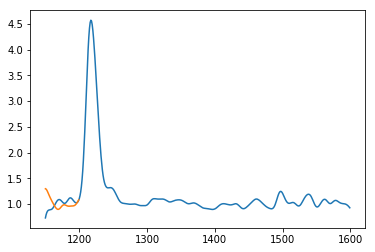

In [13]:
plt.plot(lambd, smooth_test_set[0])
plt.plot(range(1150, 1200), f_left_estimates_test[0])

In [14]:
index = np.partition(a, [1,2,3], axis=1)[:,1:4]
index

NameError: name 'a' is not defined

In [15]:
np.maximum(1 - a, 0)

NameError: name 'a' is not defined

In [16]:
neighb(3)[:10, :4]

TypeError: tuple indices must be integers or slices, not tuple

In [66]:
mt = distance_matrix(smooth_train_set)

In [69]:
mt[1, 1]

0.0